# WeatherAPI
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
import openweathermapy

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# pprint
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print("There are {} cities found from random geo-coordinates.".format(len(cities)))

There are 597 cities found from random geo-coordinates.


### OpenWeatherMap API Calls

* Loop though each city on the cities list 
* Perform a (current) weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
    * Note: including `end = '\r'` can override the previous line, which can make the output much cleaner

In [3]:
# convert the time returned(in seconds) to meaningful time expression
def convert_time(sec):
    order = [ -2, 1, 2, -1, 0]
    local_time = time.ctime(sec).split(" ")
    order_time = [local_time[i] for i in order]
    return f"{order_time[0]} {order_time[1]}/{order_time[2]}/{order_time[3]} ({order_time[4]})"

In [4]:
# Compose url 
unit = "Imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?"
param = {"appid" : api_key,
         "units" : unit}

# Initiate DataFrame
city_weather_now_df = pd.DataFrame(columns=["City",
                                            "Country",
                                            "Lat",
                                            "Lng",
                                            "Max Temp (F)",
                                            "Cloudiness (%)",
                                            "Humidity (%)",
                                            "Wind Speed (mph)",
                                            "Data Retrieved Time"])

# Begin printing the information 
print("Beginning Data Retrieval")
print("----------------------------------------------------------------------------------")

# Loop through the cities, find the cities that OpenWeatherMap can find 
# and store the information to the DataFrame
i = 0
not_found = 0
for city in cities:
    param["q"] = city
    data = requests.get(base_url, params=param).json()
    
    try:
        city_weather_now_df.loc[i, "City"] = data["name"]
        city_weather_now_df.loc[i, "Country"] = data["sys"]["country"]
        city_weather_now_df.loc[i, "Lat"] = data["coord"]["lat"]
        city_weather_now_df.loc[i, "Lng"] = data["coord"]["lon"]
        city_weather_now_df.loc[i, "Max Temp (F)"] = data["main"]["temp_max"]
        city_weather_now_df.loc[i, "Cloudiness (%)"] = data["clouds"]["all"]
        city_weather_now_df.loc[i, "Humidity (%)"] = data["main"]["humidity"]
        city_weather_now_df.loc[i, "Wind Speed (mph)"] = data["wind"]["speed"]
        city_weather_now_df.loc[i, "Data Retrieved Time"] = convert_time(data['dt'])
        i += 1
        print("Processing Record {:3d}/{} | {:20s}\t(# cities not found: {:3d})        ".format(i,
                                                                                         len(cities),
                                                                                         data['name'],
                                                                                         not_found))
              #, end='\r')
              # uncomment this line for clean output
    except KeyError:
        print("City not found. Skipping...{:28s}\t(# cities not found: {:3d})          ".format(" ",
                                                                                                not_found + 1))
              # ,end='\r')
              # uncomment this line for clean output
        not_found += 1

print("\n")
print(f"""
----------------------------------------------------------------------------------
Data Retrieval Complete  
{len(city_weather_now_df)} cities' weather data collected
----------------------------------------------------------------------------------""")

Beginning Data Retrieval
----------------------------------------------------------------------------------
Processing Record   1/597 | Saint-Philippe      	(# cities not found:   0)        
Processing Record   2/597 | Atuona              	(# cities not found:   0)        
Processing Record   3/597 | Flinders            	(# cities not found:   0)        
Processing Record   4/597 | Castro              	(# cities not found:   0)        
Processing Record   5/597 | Cape Town           	(# cities not found:   0)        
Processing Record   6/597 | Albany              	(# cities not found:   0)        
Processing Record   7/597 | Rikitea             	(# cities not found:   0)        
Processing Record   8/597 | Half Moon Bay       	(# cities not found:   0)        
City not found. Skipping...                            	(# cities not found:   1)          
Processing Record   9/597 | Mahebourg           	(# cities not found:   1)        
Processing Record  10/597 | Nikolskoye          	(# c

Processing Record  87/597 | Nha Trang           	(# cities not found:  12)        
City not found. Skipping...                            	(# cities not found:  13)          
Processing Record  88/597 | Barrow              	(# cities not found:  13)        
Processing Record  89/597 | Cullinan            	(# cities not found:  13)        
Processing Record  90/597 | Leningradskiy       	(# cities not found:  13)        
Processing Record  91/597 | Strangnas           	(# cities not found:  13)        
Processing Record  92/597 | Luderitz            	(# cities not found:  13)        
Processing Record  93/597 | Ondangwa            	(# cities not found:  13)        
Processing Record  94/597 | Dikson              	(# cities not found:  13)        
Processing Record  95/597 | Hermanus            	(# cities not found:  13)        
Processing Record  96/597 | Dhidhdhoo           	(# cities not found:  13)        
Processing Record  97/597 | Santiago            	(# cities not found:  13)    

Processing Record 171/597 | Clarence Town       	(# cities not found:  27)        
Processing Record 172/597 | Moree               	(# cities not found:  27)        
Processing Record 173/597 | Isla Vista          	(# cities not found:  27)        
Processing Record 174/597 | Tasiilaq            	(# cities not found:  27)        
Processing Record 175/597 | San Jeronimo        	(# cities not found:  27)        
Processing Record 176/597 | Faanui              	(# cities not found:  27)        
City not found. Skipping...                            	(# cities not found:  28)          
Processing Record 177/597 | Buraydah            	(# cities not found:  28)        
Processing Record 178/597 | Alofi               	(# cities not found:  28)        
Processing Record 179/597 | Erzin               	(# cities not found:  28)        
Processing Record 180/597 | Angoram             	(# cities not found:  28)        
Processing Record 181/597 | Sabha               	(# cities not found:  28)    

Processing Record 259/597 | Qaqortoq            	(# cities not found:  37)        
Processing Record 260/597 | Teguise             	(# cities not found:  37)        
Processing Record 261/597 | Carauari            	(# cities not found:  37)        
Processing Record 262/597 | Husainabad          	(# cities not found:  37)        
Processing Record 263/597 | Southampton         	(# cities not found:  37)        
City not found. Skipping...                            	(# cities not found:  38)          
Processing Record 264/597 | Lompoc              	(# cities not found:  38)        
City not found. Skipping...                            	(# cities not found:  39)          
Processing Record 265/597 | Cartagena           	(# cities not found:  39)        
Processing Record 266/597 | Japura              	(# cities not found:  39)        
Processing Record 267/597 | San Patricio        	(# cities not found:  39)        
Processing Record 268/597 | Dongsheng           	(# cities not found:

Processing Record 344/597 | Mora                	(# cities not found:  50)        
Processing Record 345/597 | Saint George        	(# cities not found:  50)        
Processing Record 346/597 | Tanout              	(# cities not found:  50)        
City not found. Skipping...                            	(# cities not found:  51)          
City not found. Skipping...                            	(# cities not found:  52)          
Processing Record 347/597 | Peniche             	(# cities not found:  52)        
Processing Record 348/597 | Furstenwalde        	(# cities not found:  52)        
Processing Record 349/597 | Comodoro Rivadavia  	(# cities not found:  52)        
Processing Record 350/597 | Linxi               	(# cities not found:  52)        
Processing Record 351/597 | Barao de Melgaco    	(# cities not found:  52)        
Processing Record 352/597 | Hami                	(# cities not found:  52)        
Processing Record 353/597 | Norman Wells        	(# cities not found:

Processing Record 428/597 | Port Blair          	(# cities not found:  64)        
Processing Record 429/597 | Warmbad             	(# cities not found:  64)        
Processing Record 430/597 | Adrar               	(# cities not found:  64)        
Processing Record 431/597 | Aswan               	(# cities not found:  64)        
Processing Record 432/597 | Hofn                	(# cities not found:  64)        
Processing Record 433/597 | Mackenzie           	(# cities not found:  64)        
Processing Record 434/597 | Zhigansk            	(# cities not found:  64)        
Processing Record 435/597 | Yermakovskoye       	(# cities not found:  64)        
Processing Record 436/597 | Hosbach             	(# cities not found:  64)        
Processing Record 437/597 | Ordzhonikidze       	(# cities not found:  64)        
Processing Record 438/597 | Lata                	(# cities not found:  64)        
Processing Record 439/597 | Chegdomyn           	(# cities not found:  64)        
Proc

Processing Record 518/597 | The Valley          	(# cities not found:  72)        
Processing Record 519/597 | San Carlos de Bariloche	(# cities not found:  72)        
Processing Record 520/597 | Asbestovskiy        	(# cities not found:  72)        
Processing Record 521/597 | Dombarovskiy        	(# cities not found:  72)        
Processing Record 522/597 | Porto Novo          	(# cities not found:  72)        
Processing Record 523/597 | Llata               	(# cities not found:  72)        
Processing Record 524/597 | Quijingue           	(# cities not found:  72)        
Processing Record 525/597 | Kuryk               	(# cities not found:  72)        



----------------------------------------------------------------------------------
Data Retrieval Complete  
525 cities' weather data collected
----------------------------------------------------------------------------------


### Save data stored in DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_now_df.count()

City                   525
Country                525
Lat                    525
Lng                    525
Max Temp (F)           525
Cloudiness (%)         525
Humidity (%)           525
Wind Speed (mph)       525
Data Retrieved Time    525
dtype: int64

In [6]:
city_weather_now_df.head()

,City,Country,Lat,Lng,Max Temp (F),Cloudiness (%),Humidity (%),Wind Speed (mph),Data Retrieved Time
0,Saint-Philippe,CA,45.36,-73.48,68,75,63,7.76,00:07:46 Jun/22/2019 (Sat)
1,Atuona,PF,-9.8,-139.03,82.07,44,78,15.57,00:03:36 Jun/22/2019 (Sat)
2,Flinders,AU,-34.58,150.85,57.2,1,47,17.22,00:04:29 Jun/22/2019 (Sat)
3,Castro,CL,-42.48,-73.76,51.8,75,93,12.75,00:03:13 Jun/22/2019 (Sat)
4,Cape Town,ZA,-33.93,18.42,57.99,90,93,12.75,00:05:08 Jun/22/2019 (Sat)


In [7]:
city_weather_now_df.to_csv(output_data_file)

### Plotting the Data
* Plot `Max Temperature`, `Humidity`, `Cloudiness`, and `Wind Speed` across all `Latitude`.
* Save the plotted figures as .pngs.

In [8]:
font = 15
date = city_weather_now_df['Data Retrieved Time'][0].split(' ')[1] 

# define a functino that deals with the plotting style
def plot_setting(x, y, color):
    plt.figure(figsize=(8,5))
    plt.scatter(x, y, facecolor = color, edgecolor = 'k', alpha = 0.8)
    xrange = max(x) - min(x)
    yrange = max(y) - min(y)
    plt.xlim(min(x) - xrange/5, max(x) + xrange/5)
    plt.ylim(min(y) - yrange/5, max(y) + yrange/5)
    plt.grid(True)

#### Latitude vs. Temperature Plot

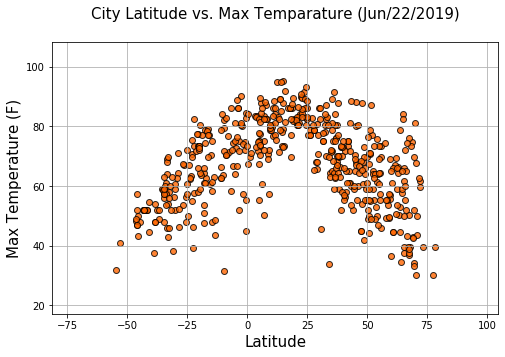

In [9]:
# define x, y axis
col = ["Lat", "Max Temp (F)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Max Temperature
color = (1, 0.4, 0)
plot_setting(x,y, color)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel("Max Temperature (F)", fontsize = font)
plt.title(f"City Latitude vs. Max Temparature ({date})\n", fontsize = font)
plt.savefig("output_data/max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

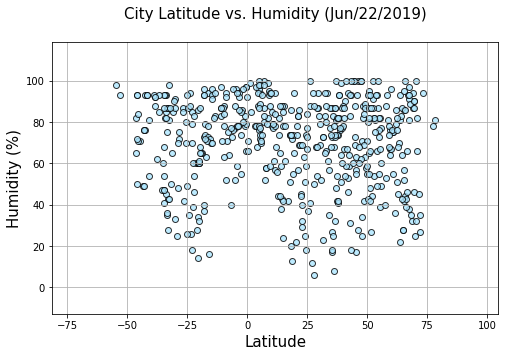

In [10]:
# define x, y axis
col = ["Lat", "Humidity (%)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Humidity
color = (0.68, 0.9, 1)
plot_setting(x,y,color)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel(col[1], fontsize = font)
plt.title(f"City Latitude vs. Humidity ({date})\n", fontsize = font)
plt.savefig("output_data/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

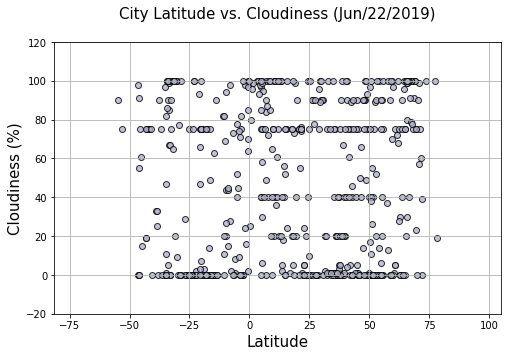

In [11]:
# define x, y axis
col = ["Lat", "Cloudiness (%)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Cloudiness
color = (0.7, 0.7, 0.8)
plot_setting(x,y,color)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel(col[1], fontsize = font)
plt.title(f"City Latitude vs. Cloudiness ({date})\n", fontsize = font)
plt.savefig("output_data/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

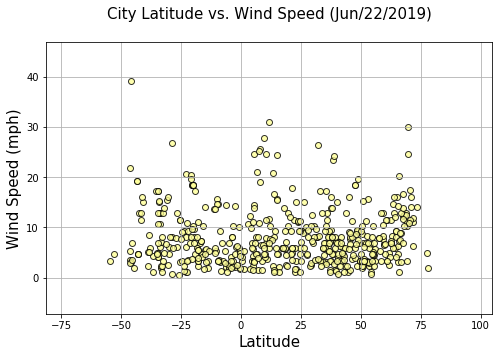

In [12]:
# define x, y axis
col = ["Lat", "Wind Speed (mph)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Wind Speed
color = (1, 1, 0.6)
plot_setting(x,y,color)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel(col[1], fontsize = font)
plt.title(f"City Latitude vs. Wind Speed ({date})\n", fontsize = font)
plt.savefig("output_data/wind_speed.png")
plt.show()